In [1]:
import numpy as np
from numpy.linalg import norm
import cmath
import math
import random
import matplotlib.pyplot as plt
try:
    from src.sparse_matrix import SparseMatrix
    from src.quantum_register import QuantumRegister
    from src.quantum_operator import Operator
    from src.operators import *
except:
    from sparse_matrix import SparseMatrix
    from quantum_register import QuantumRegister
    from quantum_operator import Operator
    from operators import *

    
    
def UaGate(N,m,t_qubits):
    
    l_qubits = round(math.sqrt(N))+1
    
    tot_qubits = t_qubits+l_qubits
    
    QR3 = QuantumRegister(tot_qubits)
    
    QR3.setState([0]*(2**tot_qubits))
    
    second_reg_vals_  = []
    
    for i in range(2**t_qubits):
        
        res = int(np.mod(m**i, N))
        
        QR1 = QuantumRegister(t_qubits)
        QR2 = QuantumRegister(l_qubits)
        
        state_1 = np.zeros(2**t_qubits)
        state_2 = np.zeros(2**l_qubits)
        
        state_1[i] = 1
        state_2[res] = 1
        
        QR1.setState(state_1)
        QR2.setState(state_2)
        
        QR3 = QR3 + (QR1*QR2)
        
        second_reg_vals_ += [res]
        
    second_reg_vals_ = np.array(second_reg_vals_)
    
    second_reg_vals_ = np.unique(second_reg_vals_)
    
    print(second_reg_vals_)
    
    QR3.normalize()
    
    return QR3,second_reg_vals_

def measure_second_reg(N,m,t_qubits,second_reg_vals_):
    
    mes_val = random.choice(second_reg_vals_)
    
    QR1 = QuantumRegister(t_qubits)
    
    state_1 = np.zeros(2**t_qubits)
    
    for i in range(2**t_qubits):
        
        res = int(np.mod(m**i, N))
        
        if res == mes_val:
            
            state_1[i] = 1
            
    QR1.setState(state_1)
    
    return QR1,mes_val
    
    
    



In [3]:
a,c = UaGate(21,15,8)



[ 1 15]


In [4]:
qr,mes_val = measure_second_reg(21,15,8,c)

# qr.plotRegister()

In [5]:
ft = invQFT(8) * qr

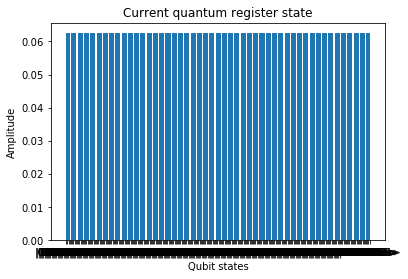

In [6]:
ft.plotRegister()

In [143]:
ft2 = (invQFT(8)%I(3)) * a

In [157]:
ft2.measure()

4

In [12]:
mes_ = []
for  i in range(1,100):
    
    mes_ += [ft.measure()]
    
    
counts = np.bincount(mes_)
print(np.argmax(counts))

97


In [2]:
def QFT(n_qubits):
    
    n = n_qubits
    
    QFT = H(1) % I(n - 1)
    
    for j in range(1,n):
        
        base = R_phi(2*math.pi/(2**(j+1)))
        c_r = CUGate(base, empty_qw= j - 1, reverse= True) 
        
        if j != n-1:
            
            c_r = c_r % I(n - j - 1)
        
        QFT = c_r * QFT
        
    for i in range(1,n-1):
        
        QFT = (I(i) % H(1) % I(n - i - 1)) * QFT
        
        for j in range(1,n-i):
            
            base = R_phi(2*math.pi/(2**(j+1)))
            c_r = I(i) % CUGate(base, empty_qw= j - 1, reverse= True) 
            
            if j != n-i-1:
                
                c_r = c_r % I(n - i - j - 1)
                
            
            QFT = c_r * QFT
            
    
    QFT = (I(n-1) % H(1)) * QFT

#     QFT = QFT.getHermTranspose()
    
    return QFT
    
   
    
def invQFT(n_qubits):
    
    return QFT(n_qubits).getHermTranspose()
    

In [50]:
ft.measure()

147

In [9]:
a = [1,2,2,3,4,5,5,5,6]

counts = np.bincount(a)
print(np.argmax(counts))

5


In [140]:
round(math.sqrt(6))

2

In [13]:
math.gcd(97,256)

1

In [11]:
math.gcd(4**(int(256/8))-1,6)

3

2

1024

In [17]:
math.gcd(15**(int(256/(2*1)))+1,21)

1

In [164]:
np.mod(-1, 15)

14

In [171]:
np.mod(7**(int(2048/(2*1024))),15)

7